# Exercise 1: E‑commerce Delivery Times

An online retailer promises 3‑day shipping. Occasionally, storms delay a few packages. Can you confidently continue advertising that you offer “3 day delivery” given occasional storm delays? To do this, you need to complete three tasks. 

1) run the below cell to simulate the data

2) calculate a log-likelihood estimate where we assume delivery times $~ N(\mu, \sigma^2)$ with known $\sigma = 0.5$ Find the $\mu$ that maximizes the likelihood of $\mu$ (note we will be minimizing the log of the likelihood.)

3) Calculate a 95% boostrap CI: Resample the 100 observations 2000 times, compute $\hat{\mu}$ for each bootstrap sample, and take the 2.5 % and 97.5 % percentiles.



(array([19., 47., 31.,  0.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1.60070545,  2.49050217,  3.3802989 ,  4.27009563,  5.15989236,
         6.04968909,  6.93948581,  7.82928254,  8.71907927,  9.608876  ,
        10.49867272]),
 <BarContainer object of 10 artists>)

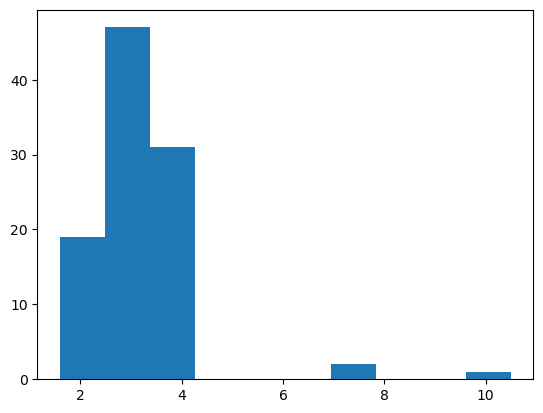

In [21]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
# 100 on‑time deliveries ~ N(3 days, 0.5**2)
delivery_times = np.random.normal(3.0, 0.5, size=100)
# 3 extreme delays
delivery_times[:3] += np.array([5.0, 7.0, 4.0])

plt.hist(delivery_times)


### Helpful code:

In [24]:
from scipy import stats

# 1. Define neg‐log‐likelihood correctly 
def neg_log_lik(mu, data):
    return -np.sum(stats.norm.logpdf(data, loc=mu, scale=0.5))

# 2. Define your grid
mu_values = np.linspace(0.0, 6.0, 601)

# 3. Compute NLL on full data
nlls = [ neg_log_lik(mu, delivery_times) for mu in mu_values ]

# your task: find the best value from nlls
best_val = mu_values[np.argmin(nlls)]
print("Best value of mu: ", best_val)

# 4. Bootstrap
boots = []
for _ in range(2000):
    sample = np.random.choice(delivery_times, size=100, replace=True)
    nlls_bs = [
        -np.sum(stats.norm.logpdf(sample, loc=mu, scale=0.5))
        for mu in mu_values
    ]
    boots.append(mu_values[np.argmin(nlls_bs)])

# your task: get the 2.5 and 97.5 %ile from boots
ci_lower, ci_upper = np.percentile(boots, [2.5, 97.5])
print("CI: ", ci_lower, "to", ci_upper)


Best value of mu:  3.17
CI:  2.98 to 3.4


## Questions

1) What is $\hat{\mu}$? How far is it from 3.0 days, and how did the 3 outliers pull it?

2) Does the 95 % CI include 3.0? What does that imply for your “3‑day promise”?

3) If you removed the 3 delays, how would μ̂ and the CI change?

1. The $\hat{\mu}$ is 3.17. It is .17 days from 3.0 days. The outliers increased the mean.
2. The 95% CI includes 3.0, so it does imply the "3-day promise."
3. The $\hat{\mu}$ changes to 3.01 and the CI is shifted from 2.9 to 3.13.

# Exercise 2: Call‑Center Inter‑arrival Times

A support center sees calls arriving with mean gap 5 min. Downtime causes a few very long gaps. Do you currently have enough call agents to keep the average hold‑times below 5 min? To do this you need to complete three tasks:

1) run the below cell to simulate the data

2) calculate a log-likelihood estimate where we assume call gaps $~ Exp(\lambda)$. Find the $\lambda$ that maximizes the likelihood of $\lambda$ (note we will be minimizing the log of the likelihood.)

3) Calculate a 95% boostrap CI: Resample the 200 observations 2000 times, compute $\hat{\lambda}$ for each bootstrap sample, and take the 2.5 % and 97.5 % percentiles.




/var/folders/mx/cv_f44qs0m57p0lzjb0p91kh0000gn/T/ipykernel_36319/3102566660.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return -np.sum(stats.expon.logpdf(data, scale=1/lam))


Best value of MLE:  0.18036072144288576
CI:  0.142475092164541 to 0.21385464882650537


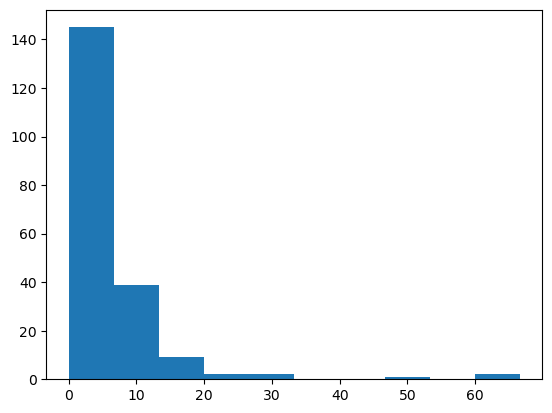

In [4]:
# pseudocode to help 
import numpy as np
from scipy import stats, optimize
# 1. MLE (PAUSE HERE WHAT IS THIS FUNCTION DOING BELOW)

# Reconstruct the data
np.random.seed(42)
gaps = np.random.exponential(scale=5.0, size=200)
gaps[:5] += np.array([30, 45, 60, 25, 50])

plt.hist(gaps)

# 1. MLE for λ
def neg_log_lik(lam, data):
    return -np.sum(stats.expon.logpdf(data, scale=1/lam))

# your task: create a grid of values to "check" (i.e., linspace like the last problem). Then, find the the best value from nlls
lambda_values =  np.linspace(0.0, 10, 500)
nlls = [ neg_log_lik(lam, gaps) for lam in lambda_values]

best_val = lambda_values[np.argmin(nlls)]
print("Best value of MLE: ", best_val)

# 2. Bootstrap CI
boots = []
for _ in range(2000):
    samp = np.random.choice(gaps, size=200, replace=True)
    r = optimize.minimize(lambda l: neg_log_lik(l, samp), x0=0.2, bounds=[(1e-6, None)])
    boots.append(r.x[0])

# your task: get the 2.5 and 97.5 %ile from boots
ci_upper = np.percentile(boots, 97.5)
ci_lower = np.percentile(boots, 2.5)
print("CI: ", ci_lower, "to", ci_upper)


## Questions

1) What is the estimated rate $\hat{\lambda}$? How does it compare to the true 0.2?

2) How robust is $\hat{\lambda}$ to the 5 downtimes (i.e., do the 5 downtimes shift the mean at all)?

3) Does the CI cover 0.2? What does this mean for staffing predictions?







1. The estimated rate is 0.18. It is slightly less than the true 0.2. 
2. Converting the estimated rate to mintues, the estimated rate gives 5.55 (1/0.18) minutes which is slightly greater than the mean gap (5 min). Therefore, the 5 downtimes do shift the mean, but not to a high degree.
3. The CI does cover 0.2, but the lower end is 0.14 --> ~7 min which shows that the mean could vary from 5-7 minutes. 

# Exercise 3: Household Electricity Usage


Hourly household consumption (kWh) is log‑normally distributed (median ~ 20 kWh); rare equipment failures spike usage. Find the most value for the electricity usage and then construct a confidence interval for them. You've only budgeted to use 20 kWh per hour. 

Best value of median:  20.5
CI:  20.09916666666667 to 26.5


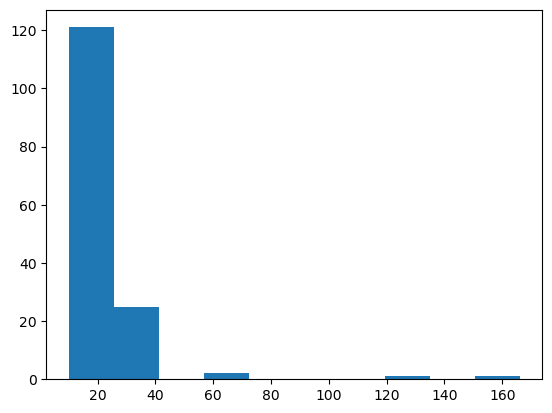

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)
usage = np.random.lognormal(mean=np.log(20), sigma=0.3, size=150)
usage[:4] *= np.array([5, 4, 6, 3])

plt.hist(usage)

def neg_log_lik(med, data):
    return -np.sum(stats.lognorm.logpdf(data, s = 0.5, loc = 0, scale = med))
                    
med_values = np.linspace(10.0, 30.0, 601)

nlls = [ neg_log_lik(med, usage) for med in med_values]

best_val = med_values[np.argmin(nlls)]
print("Best value of median: ", best_val)


#Construct a confidence interval
boots = []
for _ in range(2000):
    sample = np.random.choice(usage, size = 100, replace = True)
    nlls_bs = [
        -np.sum(stats.norm.logpdf(sample, loc = med, scale=0.5))
        for med in med_values
    ]
    boots.append(med_values[np.argmin(nlls_bs)])

ci_upper = np.percentile(boots, 97.5)
ci_lower = np.percentile(boots, 2.5)
print("CI: ", ci_lower, "to", ci_upper)

## Questions:

1) What is the estimated median usage?

2) Would you budget 20 kWh per hour per home confidently or should you budget more?

1. The estimated median usage is 20.5 kWh.
2. Yes, I would budget 20 kWh per hour per home confidently. Perhaps, I would budget more because it is on the higher end.